# Combined Cycle Power Plant Dataset

## Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Load the dataset

In [2]:
# Now we use read.csv() function from pandas to read the data from the csv and stores in the form of a data frame

df = pd.read_csv('Power_plant_cycle.csv')

## View the data

In [3]:
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


## Deep copy and Shallow copy

In [4]:
data = df      # will be using data further by creating a copy from df so that the original is intact

In [5]:
# View the copied dataframe
data

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


## Exploratory Data Analysis

In [6]:
# using head function we can retreive the top data

data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [7]:
# using tail function we can retreive the bottom data

data.tail()

,AT,V,AP,RH,PE
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


In [8]:
# We use .describe function to see the basic statistics details of the data.

data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
# Get the information about the Power_plant_cycle dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
# .shape gives the tuple of the rows and the columns 

data.shape

(9568, 5)

In [7]:
# Missing values:

data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## OUTLIERS

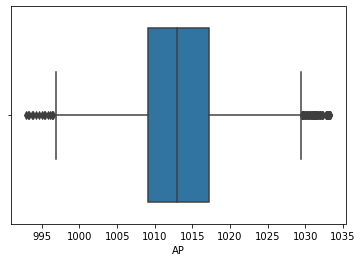

In [8]:
# Finding the Outliers in AP column:

outliers = sns.boxplot(x='AP', data=data)

In [9]:
def outlier(AP):
    sorted(AP)
    Q1,Q3 = np.percentile(AP, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

low,up = outlier(data.AP)
print(low)
print(up)

996.8600000000001
1029.5


In [10]:
data[(data.AP < low) | (data.AP > up)]
data.drop(data[(data.AP < low) | (data.AP > up)].index, inplace=True)

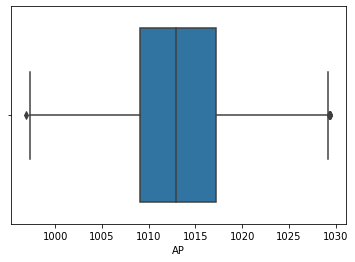

In [11]:
# After removing the outliers in AP column:

outliers = sns.boxplot(x='AP', data=data)

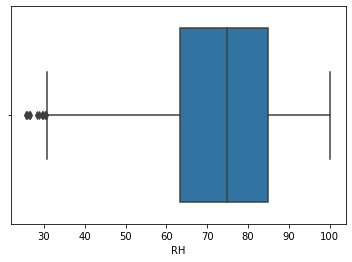

In [12]:
# Finding the Outliers in RH column:

outliers = sns.boxplot(x='RH', data=data)

In [13]:
def outlier(RH):
    sorted(RH)
    Q1,Q3 = np.percentile(RH, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

low,up = outlier(data.RH)
print(low)
print(up)

30.823749999999997
117.23375


In [14]:
data[(data.RH < low) | (data.RH > up)]
data.drop(data[(data.RH < low) | (data.RH > up)].index, inplace=True)

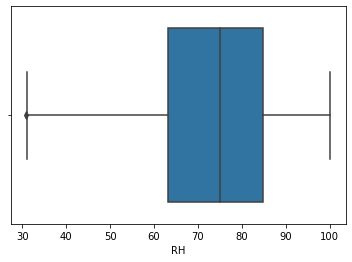

In [15]:
# After removing the outliers in RH column:

outliers = sns.boxplot(x='RH', data=data)

## Split the data

In [16]:
# Split X and y

X = data[['AT','V','AP','RH',]]
y = data[['PE']]

In [17]:
X

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [18]:
y

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


In [23]:
# .shape gives the tuple of the rows and the columns 

X.shape, y.shape

((9470, 4), (9470, 1))

## Visualization

In [24]:
# Correlation:

data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.842859,-0.509184,-0.542372,-0.947544
V,0.842859,1.000000,-0.415708,-0.310496,-0.868801
AP,-0.509184,-0.415708,1.000000,0.106294,0.521603
RH,-0.542372,-0.310496,0.106294,1.000000,0.388355
PE,-0.947544,-0.868801,0.521603,0.388355,1.000000


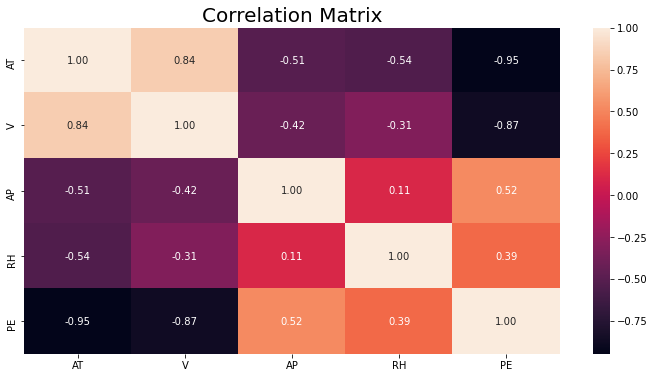

In [25]:
# Correlation matrix visualization

f, ax = plt.subplots(figsize= [12, 6])
sns.heatmap(data.corr(), annot=True, fmt=".2f")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

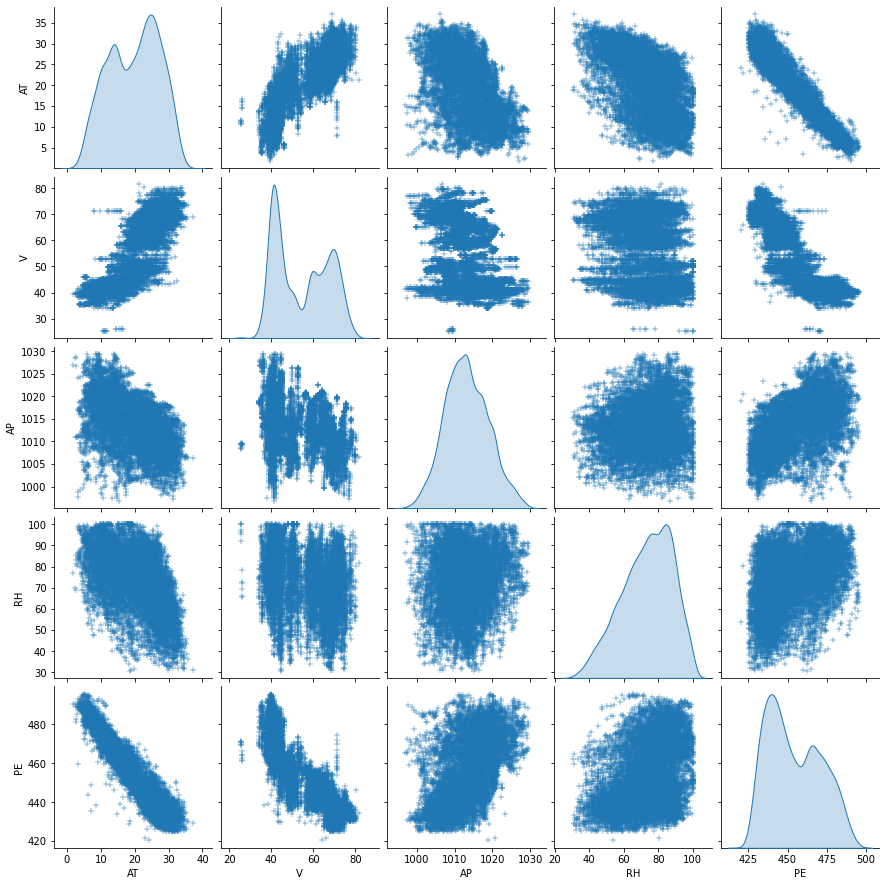

In [26]:
# Visualizing all columns using pair plot

sns.pairplot(data, diag_kind='kde', markers='+')

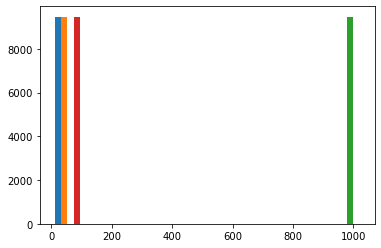

In [27]:
# Visual representation of X split by Histogram:

plt.hist(X)
plt.show()

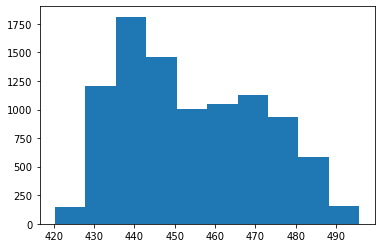

In [28]:
# Visual representation of Y split by Histogram:

plt.hist(y)
plt.show()

<AxesSubplot:title={'center':'Skewness of Net hourly Electrical Energy'}, xlabel='PE', ylabel='Density'>

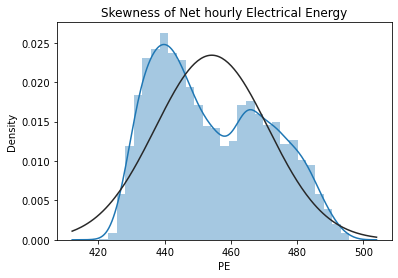

In [29]:
#Skewness
#feature- dependent variable

plt.title('Skewness of Net hourly Electrical Energy')
sns.distplot(data['PE'], fit=norm)

## train and test split method

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## Apply the model

In [20]:
# Linear Regression

from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

#### Now we have trained the model based on X and y
#### So,We are going to predict the test data based upon the trained data

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred 

array([[438.81235243],
       [464.70613335],
       [442.10826482],
       ...,
       [473.30329414],
       [463.47995132],
       [446.66456959]])

In [23]:
# prediction with new value

print(model.predict([[8.34,40.77,1010.84,90.01]]))     # 480.48_ans

[[477.12709319]]


### R2 Score

In [24]:
from sklearn.metrics import r2_score

print("R2 Score",r2_score(y_test, y_pred))

R2 Score 0.9245715944203565


## Other Statistics (Evaluation Metrics) 

### Explained Variance Score

In [25]:
from sklearn.metrics import explained_variance_score

print("Explained Variance Score",explained_variance_score(y_test, y_pred))

Explained Variance Score 0.9245863909325968


### Mean Absolute Error

In [26]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error",mean_absolute_error(y_test, y_pred))

Mean Absolute Error 3.6658044120939683


### Mean Squared Error

In [27]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error",mean_squared_error(y_test, y_pred))

Mean Squared Error 21.854550500225166


### Mean Squared Log Error

In [28]:
from sklearn.metrics import mean_squared_log_error

print("Mean Squared Log Error",mean_squared_log_error(y_test, y_pred))

Mean Squared Log Error 0.00010585627143970573


### Median Absolute Error

In [29]:
from sklearn.metrics import median_absolute_error

print("Median Absolute Error",median_absolute_error(y_test, y_pred))

Median Absolute Error 3.1290774897003075


## Accuracy:

#### This method is called train and test split method. Here we can find the accuracy of the data based upon the model that we are training. In the below cell we have used linear regression.

# Linear Regression

In [36]:
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
new_model = linear_model.LinearRegression()
new_model.fit(X_train, y_train) 
y_pred = new_model.predict(X_test)
print("R2 Score",r2_score(y_test, y_pred)) 

R2 Score 0.9245715944203565


#### Trying with various regression algorithms and to conclude one best fit algorithm

# Ridge Algorithm

In [37]:
from sklearn.linear_model import Ridge

model_RD = Ridge()
model_RD.fit(X_train, y_train)
y_pred = model_RD.predict(X_test)
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9245716568030239


# Lasso Algorithm

In [38]:
from sklearn.linear_model import Lasso 

model_LS = Lasso()
model_LS.fit(X_train, y_train)
y_pred = model_LS.predict(X_test)
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9244312271147285


# ElasticNet Algorithm

In [39]:
from sklearn.linear_model import ElasticNet 

model_EN = ElasticNet()
model_EN.fit(X_train, y_train)
y_pred = model_EN.predict(X_test)
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9242972578980744


# Support Vector Algorithm

In [40]:
from sklearn import svm 

model = svm.SVR(kernel='rbf', C=1000)
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9264914975194778


# Random Forest Algorithm

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(max_depth=5, random_state=0)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)

print("R2 Score",r2_score(y_test, y_pred))

R2 Score 0.9348176435769412


# Gradient Booster Algorithm

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score",r2_score(y_test, y_pred))

R2 Score 0.9448055229581702


# Conclusion

## For this Combined Cycle Power Plant dataset Gradient Booster Algorithm is the best fit algorithm as it gives the maximum accuracy of 94%